# Proyecto de Aprendizaje Supervisado - Clasificación de Canciones de Spotify 🎧
Este proyecto tiene como objetivo aplicar un flujo completo de aprendizaje supervisado sobre un nuevo dataset de clasificación musical, **usando modelos de clasificación** para predecir si una canción será popular o no. El dataset utilizado proviene de Kaggle: [Spotify Classification Dataset](https://www.kaggle.com/datasets/geomack/spotifyclassification).



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix,  make_scorer, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer



In [44]:
df = pd.read_csv(r"C:\Users\boter\OneDrive\Escritorio\data.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [45]:
# Ver estructura 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [46]:
##Eliminado columna, no representa ninguna función
df = df.drop(columns=["Unnamed: 0"])


In [47]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
duration_ms,2017.0,246306.197323,81981.814219,16042.000000,200015.00000,229261.000000,270333.000,1004627.000
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
key,2017.0,5.342588,3.648240,0.000000,2.00000,6.000000,9.000,11.000
liveness,2017.0,0.190844,0.155453,0.018800,0.09230,0.127000,0.247,0.969
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000
speechiness,2017.0,0.092664,0.089931,0.023100,0.03750,0.054900,0.108,0.816


Text(0, 0.5, 'Cantidad')

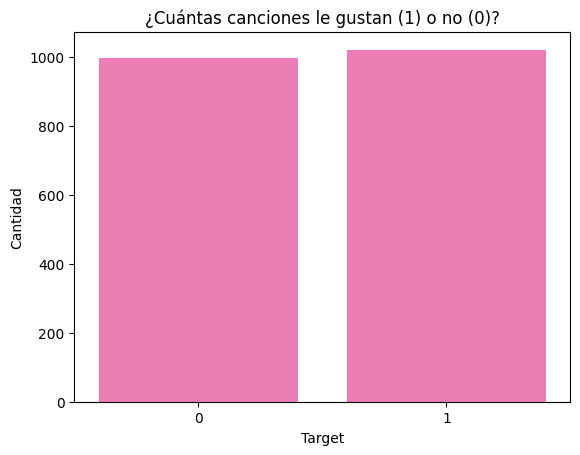

In [48]:
#Histograma 
sns.countplot(x='target', data=df, color='#ff69b4')
plt.title('¿Cuántas canciones le gustan (1) o no (0)?')
plt.xlabel('Target')
plt.ylabel('Cantidad')


🧪 El dataset está balanceado, lo cual es ideal para entrenar modelos de clasificación. Hay una distribución casi equitativa entre canciones que gustan (1) y no gustan (0).

Text(0.5, 1.0, 'Matriz de Correlación')

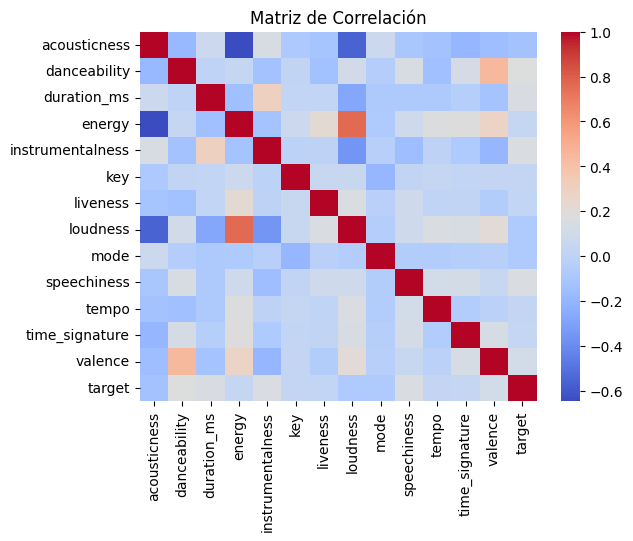

In [49]:
### Correlaciones

sns.countplot(x='target', data=df)
plt.title('Distribución de Clases')


numeric_data = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')


#### 🧪 Observaciones clave
- Variables como `energy` y `loudness` parecen estar positivamente correlacionadas.
- Algunas variables como `acousticness` podrían tener correlaciones negativas con `target`, indicando que canciones más acústicas tienden a no ser populares.
- Otras variables tienen correlaciones cercanas a 0 con `target`, lo que sugiere que individualmente no aportan mucha predicción, aunque podrían hacerlo en conjunto.



#### 🧪 Conclusiones Preliminares

Durante el análisis exploratorio de datos (EDA), se identificaron varios aspectos clave del conjunto de datos:

- Variables como `tempo`, `duration_ms` y `loudness` se encuentran en escalas muy diferentes, lo que hace necesaria la normalización o estandarización para evitar que alguna domine el entrenamiento de los modelos.
- A pesar de estar codificadas numéricamente, las variables `key`, `mode` y `time_signature` son de naturaleza categórica y deben tratarse como tales en el preprocesamiento. Este tratamiento es fundamental para que los modelos puedan interpretar correctamente estas variables.
- Se observó que algunas variables tienen distribuciones sesgadas, por lo que sería útil aplicar transformaciones si se emplean modelos sensibles a estas formas, como la regresión logística.
- No se identificaron valores nulos, lo que facilita el trabajo de limpieza y permite centrarse en la selección de características y el modelado.


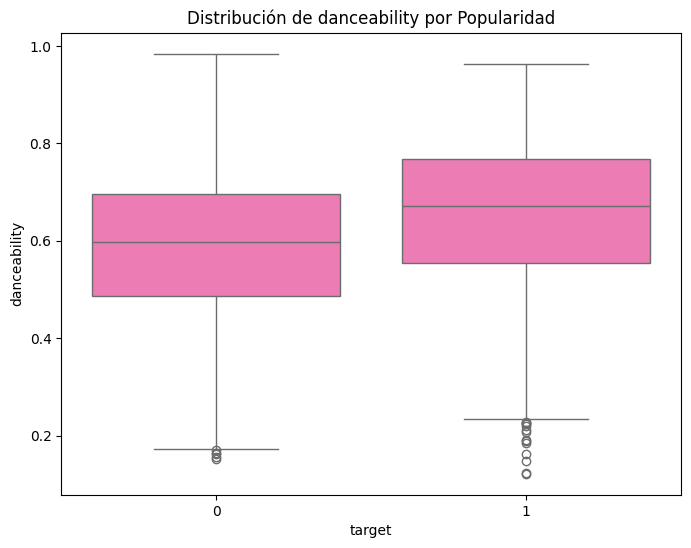

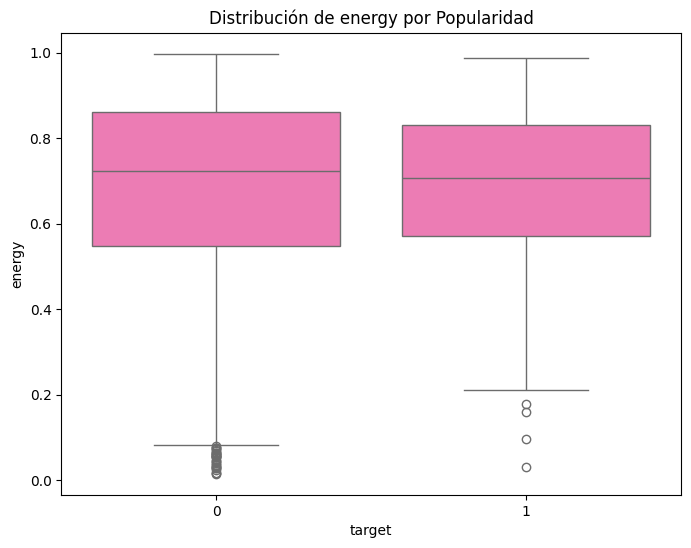

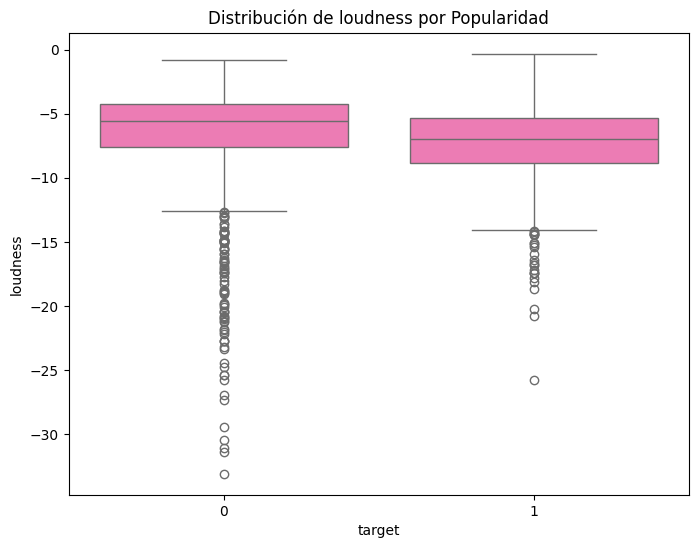

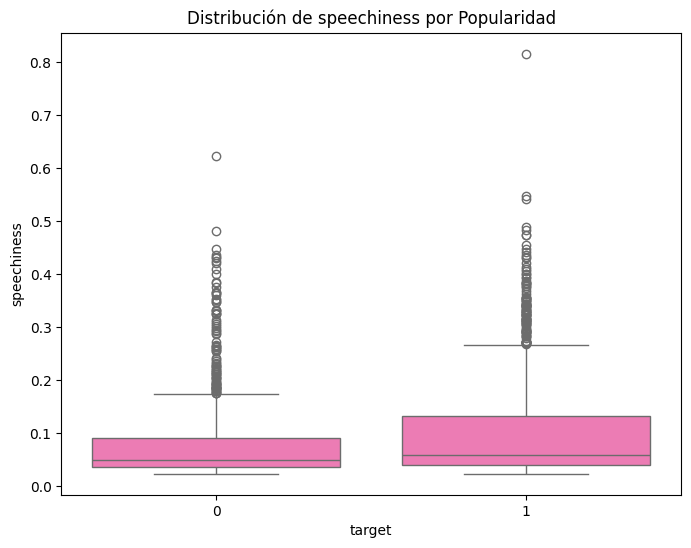

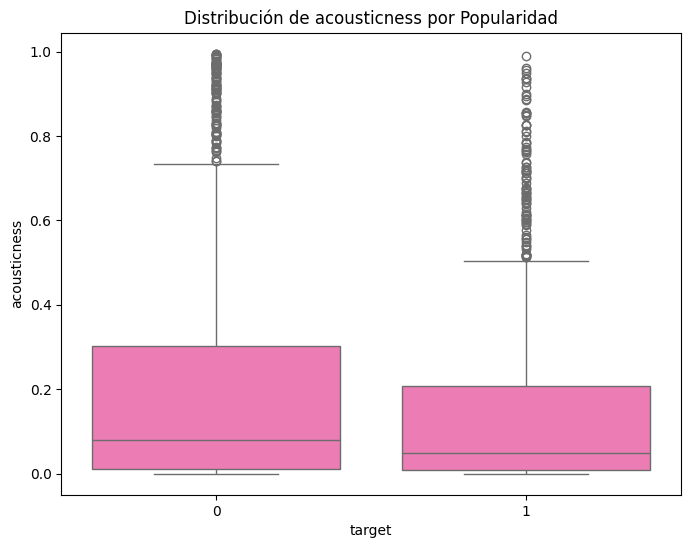

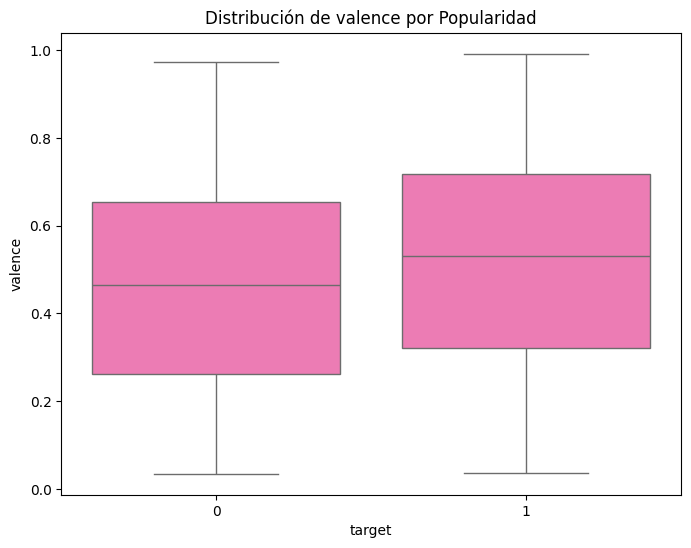

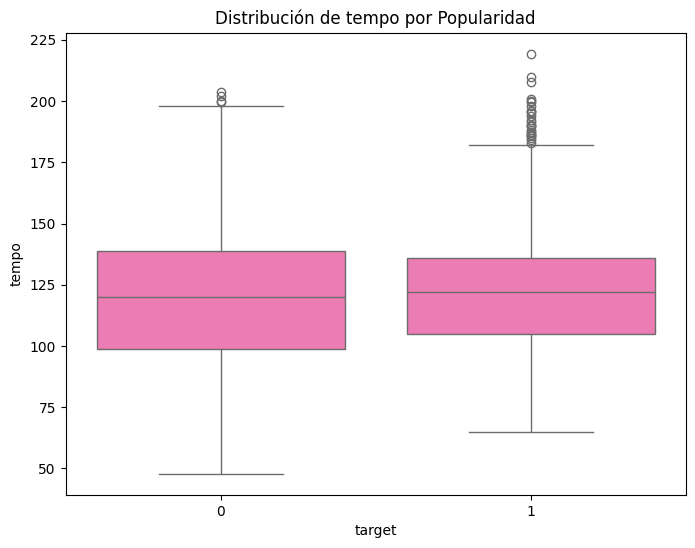

In [50]:
# Distribución de características importantes
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'tempo']
for feature in features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='target', y=feature, data=df, color='#ff69b4')
    plt.title(f'Distribución de {feature} por Popularidad')
    

1. ***Danceability vs. Popularidad*** 
Observación: Canciones populares (target 1)  indica que la mayoría de las canciones populares tienen una "bailabilidad" alta y consistente y canciones no populares (target 0) hay mayor variabilidad, incluyendo canciones poco bailables (valores cercanos a 0.2).
Implicación:Danceability muestra una clara separación entre clases, siendo un indicador fuerte de popularidad. Además, podría estar correlacionada con energy y valence por ejemplo, canciones bailables suelen ser enérgicas y positivas.
2. ***Tempo vs. Popularidad***
Observación: Las canciones populares (target 1) tienen una distribución de tempo más concentrada (mediana ~120-130 BPM), mientras que las no populares (target 0) abarcan un rango más amplio (50-180 BPM).
Implicación: El tempo podría ser un predictor útil, pero no determinante. Las canciones populares tienden a evitar tempos extremos (muy lentos o muy rápidos).
3. ***Valence vs. Popularidad***
Observación: Las canciones populares tienen una mediana de valence (positividad) más alta (~0.6 vs. ~0.4 en no populares).
Implicación: Las canciones con tonos más positivos son más populares. Valence será un predictor relevante en el modelo.
4. ***Acousticness vs. Popularidad***
Observación: Las canciones no populares tienen mayor acousticness (mediana ~0.4 vs. ~0.1 en populares). Implicación: Las canciones acústicas son menos populares en este dataset. Acousticness podría ayudar a distinguir entre clases, pero con menor peso que otras características.
5. ***Speechiness vs. Popularidad***
Observación: Las canciones populares tienen menos contenido hablado (mediana ~0.05 vs. ~0.1 en no populares).
Implicación: Las canciones con letras cantadas (en lugar de habladas) son más populares. Speechiness podría ser un predictor secundario.
6. ***Loudness vs. Popularidad***
Observación: Las canciones populares son significativamente más fuertes (mediana ~-6 dB vs. ~-12 dB en no populares).Implicación: Loudness es uno de los predictores más fuertes. Las canciones populares priorizan intensidad sonora.
7. ***Energy vs. Popularidad***
Observación: Las canciones populares tienen mayor energy (mediana ~0.7 vs. ~0.5 en no populares). Implicación: La energía (actividad e intensidad) está fuertemente asociada a la popularidad. Es un predictor crítico.

# Preprocesamiento y Pipeline

In [51]:
features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'key', 'liveness', 'loudness',
    'mode', 'speechiness', 'tempo', 'time_signature', 'valence'
]

# Variable objetivo 
target = 'target'

# Eliminar columnas irrelevantes
df = df.drop(columns=['artist', 'song_title'])

In [52]:
X = df[features]
y = df[target]

# Estratificar para mantener proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [53]:
# Identificar tipos de variables
numeric_features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence'
]

categorical_features = ['key', 'mode', 'time_signature']

# Transformador columnas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline completo
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight='balanced',  
        random_state=42
    ))
])


In [54]:
# Transformador para características numéricas 
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Transformador para características categóricas 
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesador completo
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [55]:
# Modelos que se van a comparar
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'Random Forest': RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
}

# Métricas a evaluar (Precisión, F1-Score y AUC)
metricas = {
    'Accuracy': make_scorer(accuracy_score),
    'F1-Score': make_scorer(f1_score, average='weighted'),
    'AUC': make_scorer(roc_auc_score)
}

In [56]:
# Configuración de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Almacenamiento de resultados
resultados = {}

for nombre, modelo in modelos.items():
    # Pipeline completo para cada modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])
    
    # Validación cruzada con múltiples métricas
    scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=metricas)
    
    # Almacenar resultados
    resultados[nombre] = {
        'Accuracy (CV)': np.mean(scores['test_Accuracy']),
        'F1-Score (CV)': np.mean(scores['test_F1-Score']),
        'AUC (CV)': np.mean(scores['test_AUC'])
    }


In [57]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    df[numeric_features + categorical_features], 
    df[target], 
    test_size=0.2, 
    stratify=df[target], 
    random_state=42
)

# Resultados en test
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(modelo, 'predict_proba') else None
    
    # Actualizar resultados
    resultados[nombre]['Accuracy (Test)'] = accuracy_score(y_test, y_pred)
    resultados[nombre]['F1-Score (Test)'] = f1_score(y_test, y_pred, average='weighted')
    resultados[nombre]['AUC (Test)'] = roc_auc_score(y_test, y_proba) if y_proba is not None else None

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados).T
print("\n📊 Resultados Finales:")
print(df_resultados)


📊 Resultados Finales:
                     Accuracy (CV)  F1-Score (CV)  AUC (CV)  Accuracy (Test)  \
Logistic Regression       0.653472       0.653250  0.653723         0.685644   
Decision Tree             0.721020       0.720768  0.721007         0.678218   
KNN                       0.698060       0.695824  0.699102         0.720297   
Random Forest             0.776819       0.776774  0.776830         0.754950   

                     F1-Score (Test)  AUC (Test)  
Logistic Regression         0.685634    0.730821  
Decision Tree               0.676888    0.753848  
KNN                         0.719546    0.792770  
Random Forest               0.754775    0.839877  


(0.5, 1.0)

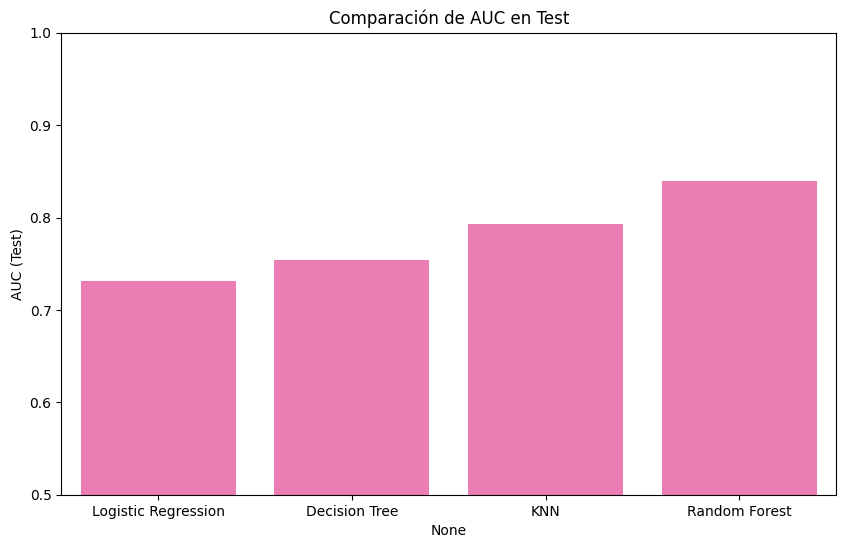

In [58]:
# Gráfico de AUC comparativa
plt.figure(figsize=(10, 6))
sns.barplot(x=df_resultados.index, y=df_resultados['AUC (Test)'], color='#ff69b4')
plt.title('Comparación de AUC en Test')
plt.ylim(0.5, 1.0)

(0.5, 1.0)

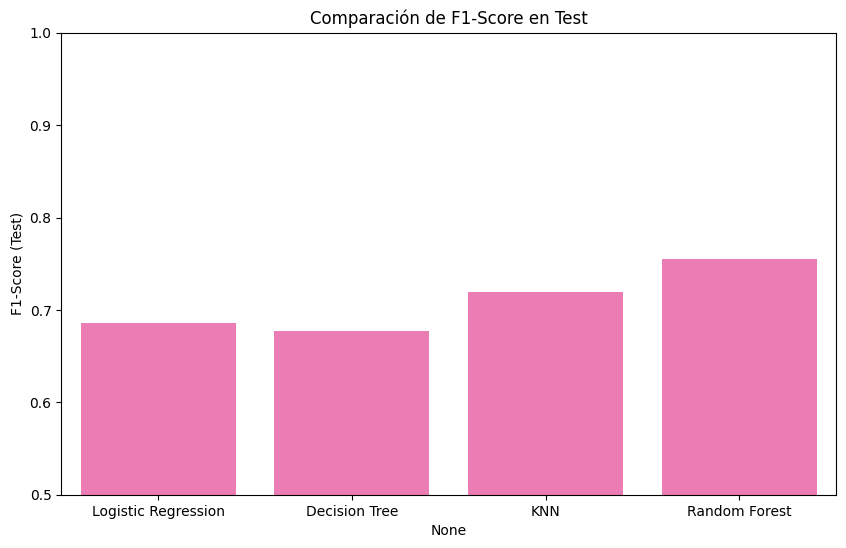

In [59]:
# Gráfico de F1-Score comparativa
plt.figure(figsize=(10, 6))
sns.barplot(x=df_resultados.index, y=df_resultados['F1-Score (Test)'], color='#ff69b4')
plt.title('Comparación de F1-Score en Test')
plt.ylim(0.5, 1.0)

### 🎯 Conclusiones Finales

Después de entrenar y evaluar cuatro modelos de clasificación supervisada sobre el dataset de Spotify, se obtuvieron las siguientes conclusiones clave:

1. **🏆 Modelo con mejor desempeño: Random Forest**
   El modelo de **Random Forest** demostró ser el más robusto, con un **F1-Score en test de 0.75** y una **AUC de 0.84**. Estos resultados indican una alta capacidad del modelo para distinguir correctamente entre las clases, incluso ante variabilidad en los datos.

2. **📈 KNN como segundo mejor modelo**
   Aunque el modelo KNN suele ser sensible a la escala, gracias a un preprocesamiento adecuado logró un **F1-Score de 0.72** y una **AUC de 0.79**, colocándose como el segundo mejor clasificador. Su rendimiento en test fue incluso superior al de Decision Tree y Logistic Regression, mostrando que KNN puede ser competitivo si se prepara bien la entrada.

3. **📉 Modelos con menor rendimiento relativo**

   * **Decision Tree** tuvo un F1-score similar a KNN (0.67) pero con una menor capacidad de generalización.
   * **Regresión Logística** fue el modelo con menor rendimiento global, con un **F1-score de 0.68** y **AUC de 0.73** en test, aunque es esperable dado que es un modelo lineal enfrentado a un problema con relaciones posiblemente no lineales.

4. **⚙️ Importancia del preprocesamiento**
   El uso de **pipelines de transformación**, incluyendo escalado y codificación, fue fundamental para garantizar una comparación justa y maximizar el rendimiento de los modelos. Este enfoque estructurado permitió:

   * Mejorar el desempeño de KNN y Regresión Logística (muy sensibles a la escala),
   * Estandarizar el flujo de trabajo de modelado y validación,
   * Evitar fugas de datos al separar adecuadamente entrenamiento y prueba.

5. **🚀 Aplicabilidad práctica**
   Este enfoque puede escalarse para aplicaciones reales como sistemas de recomendación musical, detección de tendencias de usuario o clasificación automática de contenido. Usar modelos como Random Forest. Además, permite interpretar la importancia relativa de las características y ajustar estrategias según el contexto de uso.


